# 셀프 주유소는 정말 저렴한가

### * 구별 주유 가격에 대한 데이터의 정리

In [3]:
import pandas as pd
from glob import glob # 특정 폴더 내의 파일 전체를 쉽게 불러올 수 있도록 해준다.

In [4]:
glob('data/지역*.xls')

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls',
 'data\\지역_위치별(주유소).xls']

In [5]:
stations_files = glob('data/지역*.xls')
stations_files

['data\\지역_위치별(주유소) (1).xls',
 'data\\지역_위치별(주유소) (10).xls',
 'data\\지역_위치별(주유소) (11).xls',
 'data\\지역_위치별(주유소) (12).xls',
 'data\\지역_위치별(주유소) (13).xls',
 'data\\지역_위치별(주유소) (14).xls',
 'data\\지역_위치별(주유소) (15).xls',
 'data\\지역_위치별(주유소) (16).xls',
 'data\\지역_위치별(주유소) (17).xls',
 'data\\지역_위치별(주유소) (18).xls',
 'data\\지역_위치별(주유소) (19).xls',
 'data\\지역_위치별(주유소) (2).xls',
 'data\\지역_위치별(주유소) (20).xls',
 'data\\지역_위치별(주유소) (21).xls',
 'data\\지역_위치별(주유소) (22).xls',
 'data\\지역_위치별(주유소) (23).xls',
 'data\\지역_위치별(주유소) (24).xls',
 'data\\지역_위치별(주유소) (3).xls',
 'data\\지역_위치별(주유소) (4).xls',
 'data\\지역_위치별(주유소) (5).xls',
 'data\\지역_위치별(주유소) (6).xls',
 'data\\지역_위치별(주유소) (7).xls',
 'data\\지역_위치별(주유소) (8).xls',
 'data\\지역_위치별(주유소) (9).xls',
 'data\\지역_위치별(주유소).xls']

###### * 25개 엑셀 파일을 하나로 합친다.

In [6]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)
    
station_raw = pd.concat(tmp_raw)

###### * 491개의 주유소 정보가 저장되었다.

In [7]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 41
Data columns (total 10 columns):
지역       491 non-null object
상호       491 non-null object
주소       491 non-null object
상표       491 non-null object
전화번호     491 non-null object
셀프여부     491 non-null object
고급휘발유    491 non-null object
휘발유      491 non-null object
경유       491 non-null object
실내등유     491 non-null object
dtypes: object(10)
memory usage: 42.2+ KB


###### * 필요한 정보만 추출해서 데이터프레임으로 저장

In [8]:
stations = pd.DataFrame({'Oil_store':station_raw['상호'],
                        '주소':station_raw['주소'],
                        '가격':station_raw['휘발유'],
                        '셀프':station_raw['셀프여부'],
                        '상표':station_raw['상표']})
stations

,Oil_store,주소,가격,셀프,상표
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1529,N,GS칼텍스
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1534,Y,GS칼텍스
3,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1535,Y,SK에너지
4,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크
5,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스
6,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1555,Y,SK에너지
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1558,Y,S-OIL
9,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1558,Y,SK에너지


###### * 구 이름만 추출

In [9]:
stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1529,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1534,Y,GS칼텍스,강동구
3,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1535,Y,SK에너지,강동구
4,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크,강동구
5,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스,강동구
6,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1555,Y,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1558,Y,S-OIL,강동구
9,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1558,Y,SK에너지,강동구


###### * 구 이름이 제대로 들어가 있는지 확인하기 위해 .unique()를 활용한다. 구 column에 들어간 내용을 출력한다.

In [10]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구', '관악구',
       '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object)

###### * 가격 column에 하이픈(-)이 들어가있는 column이 있다.

In [11]:
stations['가격'].unique()

array([1516, 1529, 1534, 1535, 1536, 1538, 1554, 1555, 1558, 1578, 1595,
       1598, 1599, 1668, 1953, 1457, 1458, 1462, 1465, 1474, 1475, 1479,
       1485, 1489, 1498, 1559, 1619, 1688, 1894, 1499, 1504, 1508, 1509,
       1585, 1625, '1577', '1578', '1587', '1598', '1639', '1666', '1780',
       '1798', '1799', '1879', '1889', '1899', '-', 1452, 1490, 1497,
       1518, 1519, 1523, 1540, 1544, 1548, 1574, 1575, 1577, 1592, 1597,
       1629, 1687, 1948, 1978, 1993, 1999, 1454, 1476, 1527, 1528, 1539,
       1545, 1565, 1609, 1645, 1720, 1769, 1848, 1898, '1448', '1472',
       '1478', '1487', '1488', '1498', '1499', '1509', '1519', '1529',
       '1547', '1549', '1557', '1569', '1579', '2135', 1467, 1472, 1493,
       1522, 1526, 1537, 1547, 1562, 1628, 1737, '1429', '1439', '1447',
       '1449', '1457', '1469', '1474', '1475', '1479', '1508', '1538',
       '1559', '1595', '1599', '1629', '1857', 1449, 1459, 1469, 1488,
       1492, 1494, 1785, 1835, 1869, 1879, 1890, 1895, 1422,

###### * 아래 주유소들은 예외처리를 하도록 한다.

In [12]:
stations[stations['가격']=='-']

,Oil_store,주소,가격,셀프,상표,구
12,서강주유소,서울 마포구 독막로 134 (창전동),-,N,SK에너지,마포구
13,(주)승지 염리동주유소,서울 마포구 백범로 126 (염리동),-,N,현대오일뱅크,마포구
22,KR누리(주) 종암주유소,서울 성북구 종암로 145 (종암동),-,N,SK에너지,성북구
25,현대오일뱅크(주)직영 양천셀프주유소,서울 양천구 목동로 17 (신정동),-,Y,현대오일뱅크,양천구
17,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
40,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구
41,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구


###### * stations['가격']에 하이픈(-)이 없는 column만 골라서 출력

In [13]:
stations = stations[stations['가격'] != '-']
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1529,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1534,Y,GS칼텍스,강동구
3,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1535,Y,SK에너지,강동구
4,천호현대주유소,서울 강동구 천중로 67 (천호동),1536,N,현대오일뱅크,강동구
5,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538,N,GS칼텍스,강동구
6,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1554,N,SK에너지,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1555,Y,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1558,Y,S-OIL,강동구
9,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1558,Y,SK에너지,강동구


###### * 가격 정보가 숫자형이 아니라서 숫자형으로 변환시켜 준다.

In [14]:
stations['가격'] = [float(value) for value in stations['가격']]

C:\Users\leebj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### * concat으로 엑셀파일을 합쳤기 때문에 reset_index로 인덱스를 처음부터 다시 기록하도록 한다.

In [15]:
stations.reset_index(inplace=True)
del stations['index']

In [16]:
stations

,Oil_store,주소,가격,셀프,상표,구
0,구천면주유소,서울 강동구 구천면로 357 (암사동),1516.0,N,현대오일뱅크,강동구
1,지에스칼텍스㈜ 신월주유소,서울 강동구 양재대로 1323 (성내동),1529.0,N,GS칼텍스,강동구
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1534.0,Y,GS칼텍스,강동구
3,SK네트웍스㈜암사주유소(self),서울 강동구 올림픽로 749 (암사동),1535.0,Y,SK에너지,강동구
4,천호현대주유소,서울 강동구 천중로 67 (천호동),1536.0,N,현대오일뱅크,강동구
5,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1538.0,N,GS칼텍스,강동구
6,주)지유에너지직영 오렌지주유소,서울 강동구 성안로 102 (성내동),1554.0,N,SK에너지,강동구
7,방아다리주유소,서울 강동구 동남로 811 (명일동),1555.0,Y,SK에너지,강동구
8,(주)퍼스트오일 코알라주유소,서울특별시 강동구 올림픽로 556 (성내동),1558.0,Y,S-OIL,강동구
9,sk해뜨는주유소,서울특별시 강동구 상일로 132 (강일동),1558.0,Y,SK에너지,강동구


### * 셀프 주유소가 정말 저렴한지 boxplot으로 확인하기

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

###### * 셀프 주유소가 가격이 낮다는 것을 확인할 수 있다.

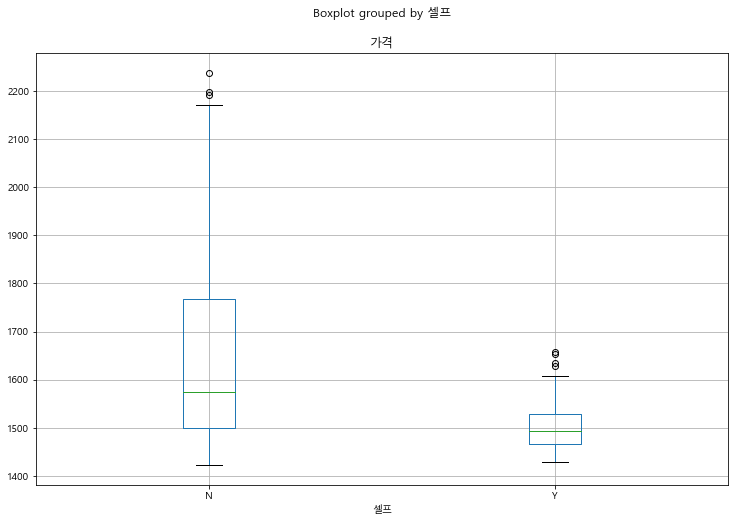

In [20]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

###### * SK주유소가 가장 가격대가 높게 형성되어있는 것을 확인할 수 있다.

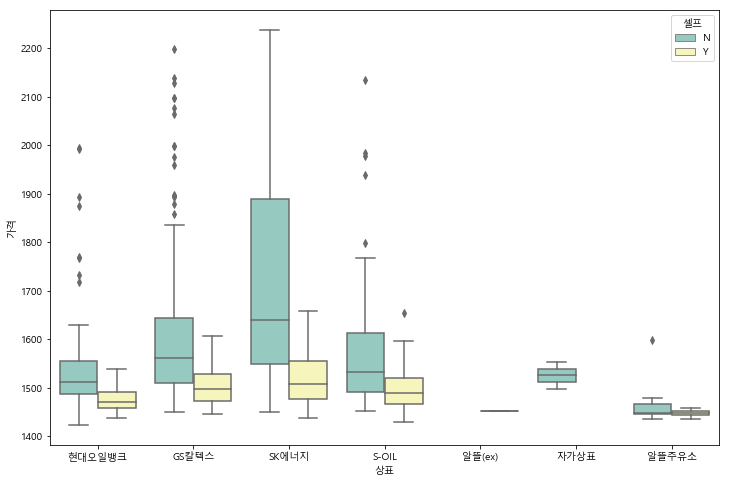

In [21]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", hue="셀프", data=stations, palette="Set3")
plt.show()

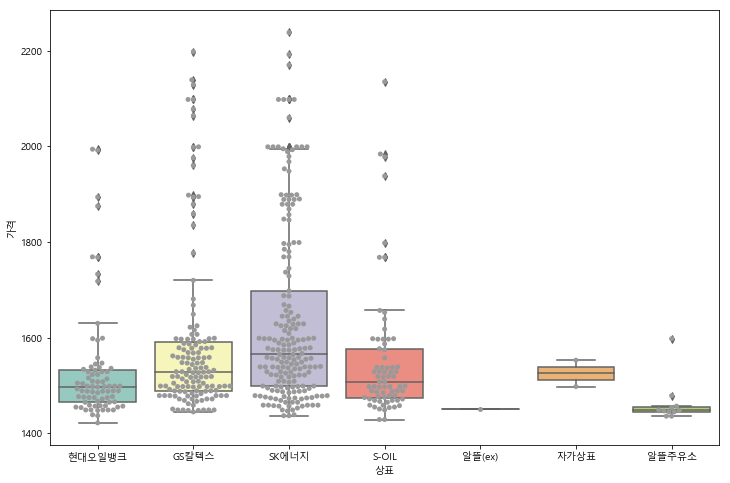

In [53]:
plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data=stations, palette="Set3")
sns.swarmplot(x="상표", y="가격", data=stations, color=".6")
plt.show()

###### * 셀프 주유소가 대체적으로 가격대가 낮다는 것을 확인할 수 있다.

### * 서울시 구별 주유 가격 확인하기

In [23]:
import json
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [24]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
290,서남주유소,서울 중구 통일로 30,2238.0,N,SK에너지,중구
289,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구
288,장충주유소,서울 중구 장충단로 202 (장충동1가),2192.0,N,SK에너지,중구
483,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
287,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2139.0,N,GS칼텍스,중구
135,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구
286,필동주유소,서울 중구 퇴계로 196 (필동2가),2129.0,N,GS칼텍스,중구
251,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구
252,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구
277,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구


In [25]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
225,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구
226,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구
168,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구
308,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1436.0,N,알뜰주유소,강서구
307,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1436.0,Y,알뜰주유소,강서구
309,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1437.0,Y,SK에너지,강서구
254,타이거주유소,서울 은평구 수색로 188 (증산동),1437.0,Y,SK에너지,은평구
253,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1437.0,Y,현대오일뱅크,은평구
170,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구
169,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구


In [26]:
import numpy as np
gu_data = pd.pivot_table(stations, index=["구"], values=["가격"], \
                        aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1731.750000
강동구,1587.750000
강북구,1468.538462
강서구,1505.205882
관악구,1541.687500


###### * 서울시 구별 주유 가격을 지도에 표현

In [50]:
geo_path = 'data/02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='Stamen Toner')
map.choropleth(geo_data = geo_data, data = gu_data, columns=[gu_data.index, '가격'], \
               fill_color='PuRd', key_on='feature.id')
map

### * 서울시 주유 가격 상하위 10개 주유소 지도에 표기하기

###### * 주유 가격 상위 10개 주유소 변수 저장

In [52]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
290,서남주유소,서울 중구 통일로 30,2238.0,N,SK에너지,중구
289,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구
288,장충주유소,서울 중구 장충단로 202 (장충동1가),2192.0,N,SK에너지,중구
483,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구
287,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2139.0,N,GS칼텍스,중구
135,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구
286,필동주유소,서울 중구 퇴계로 196 (필동2가),2129.0,N,GS칼텍스,중구
251,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구
252,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구
277,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구


###### * 주유 가격 하위 10개 주유소

In [55]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
225,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구
226,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구
168,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구
308,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1436.0,N,알뜰주유소,강서구
307,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1436.0,Y,알뜰주유소,강서구
309,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1437.0,Y,SK에너지,강서구
254,타이거주유소,서울 은평구 수색로 188 (증산동),1437.0,Y,SK에너지,은평구
253,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1437.0,Y,현대오일뱅크,은평구
170,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구
169,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구


In [57]:
gmap_key = "*****"
gmaps = googlemaps.Client(key=gmap_key)

###### * 주유 가격 상위 10개 주유소의 위도, 경도 정보 읽기

In [59]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    try:
        tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0].get('geometry')
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
        
    except: # try문 실행 실패 시, nan이 저장되도록 함.
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan!")
        
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
290,서남주유소,서울 중구 통일로 30,2238.0,N,SK에너지,중구,37.558348,126.972090
289,SC(주) 역전주유소,서울 중구 퇴계로 15,2198.0,N,GS칼텍스,중구,37.557001,126.974495
288,장충주유소,서울 중구 장충단로 202 (장충동1가),2192.0,N,SK에너지,중구,37.562719,127.007010
483,뉴서울(강남),서울 강남구 언주로 716 (논현동),2170.0,N,SK에너지,강남구,37.517636,127.035756
287,지에스칼텍스(주)초동주유소,서울 중구 마른내로 31,2139.0,N,GS칼텍스,중구,37.564944,126.991136
135,삼선주유소,서울 성북구 창경궁로 324,2135.0,N,S-OIL,성북구,37.587908,127.005575
286,필동주유소,서울 중구 퇴계로 196 (필동2가),2129.0,N,GS칼텍스,중구,37.560850,126.993653
251,에너비스,서울 용산구 한남대로 82 (한남동),2098.0,N,SK에너지,용산구,37.535952,127.006130
252,한남지점,서울 용산구 한남대로21길 4 (한남동),2098.0,N,SK에너지,용산구,37.534657,127.006063
277,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2098.0,N,GS칼텍스,종로구,37.574464,126.966618


In [60]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    try:
        tmp_add = oil_price_bottom10['주소'][n].split('(')[0]
        tmp_map = gmaps.geocode(tmp_add)
        
        tmp_loc = tmp_map[0]['geometry']
        lat.append(tmp_loc['location']['lat'])
        lng.append(tmp_loc['location']['lng'])
    
    except:
        lat.append(np.nan)
        lng.append(np.nan)
        print("Here is nan!")
        
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
225,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1422.0,N,현대오일뱅크,강북구,37.631582,127.017939
226,북서울고속주유소,서울특별시 강북구 삼양로 410 (수유동),1429.0,Y,S-OIL,강북구,37.640155,127.017203
168,현대주유소,서울 양천구 남부순환로 372 (신월동),1429.0,Y,S-OIL,양천구,37.533811,126.829240
308,뉴신정주유소,서울특별시 강서구 곰달래로39길 10 (화곡동),1436.0,N,알뜰주유소,강서구,37.531820,126.855564
307,화곡역주유소,서울특별시 강서구 강서로 154 (화곡동),1436.0,Y,알뜰주유소,강서구,37.540657,126.841506
309,강서오곡셀프주유소,서울특별시 강서구 벌말로 254 (오곡동),1437.0,Y,SK에너지,강서구,37.555284,126.768567
254,타이거주유소,서울 은평구 수색로 188 (증산동),1437.0,Y,SK에너지,은평구,37.578424,126.902050
253,(주)명연에너지 수색훼미리주유소,서울 은평구 수색로 236 (수색동),1437.0,Y,현대오일뱅크,은평구,37.581122,126.897774
170,형산석유(주)원주유소,서울 양천구 남부순환로 408,1439.0,N,현대오일뱅크,양천구,37.531003,126.831022
169,개나리(셀프주유소),서울 양천구 남부순환로 442 (신월동),1439.0,Y,SK에너지,양천구,37.528087,126.832981


###### * 지도에 표현

In [62]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]],
                           radius=15, color='#CD3181',
                           fill_color='#CD3181').add_to(map)
        
    for n in oil_price_bottom10.index:
        if pd.notnull(oil_price_bottom10['lat'][n]):
            folium.CircleMarker([oil_price_bottom10['lat'][n],
                                oil_price_bottom10['lng'][n]],
                               radius=15, color='#3186cc',
                               fill_color='#3186cc').add_to(map)
            
map